# Projet - DataScience

In [69]:
#Chargement des bibliothèques nécessaires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
#Chargement du jeu de données
df = pd.read_csv('Datasets/Customers.csv')

In [71]:
#Afficher les 5 premières lignes du dataframe
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [72]:
#Afficher les 5 dernières lignes du dataframe
df.tail()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2
1999,2000,Male,90,110610,52,Entertainment,5,2


In [73]:
#Afficher les informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [74]:
#Afficher la liste des variables
df.columns.tolist()

['CustomerID',
 'Gender',
 'Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Profession',
 'Work Experience',
 'Family Size']

Notre jeu de données est composé de 8 colonnes et de 2000 lignes.

In [75]:
#Afficher le nombre de lignes et le nombre de colonnes du dataframe
df.shape

(2000, 8)

In [76]:
#Afficher le nombre d'éléments du dataset
df.size

16000

In [77]:
#Effectuez une normalisation des noms de colonnes pour plus de commodité dans les utilisations futures
df = df.rename(columns={'Annual Income ($)': 'Annual_Income',
                        'Spending Score (1-100)': 'Spending_Score',
                        'Work Experience':'Work_Experience',
                        'Family Size':'Family_Size'})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score',
       'Profession', 'Work_Experience', 'Family_Size'],
      dtype='object')

In [78]:
#Les types de données de chaque colonne sont les suivants
df.dtypes

CustomerID          int64
Gender             object
Age                 int64
Annual_Income       int64
Spending_Score      int64
Profession         object
Work_Experience     int64
Family_Size         int64
dtype: object

In [79]:
#Vérifiez la présence de lignes en double
df.duplicated().sum()

0

In [80]:
#Vérifier les valeurs manquantes dans chaque colonne
df.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income       0
Spending_Score      0
Profession         35
Work_Experience     0
Family_Size         0
dtype: int64

<Axes: >

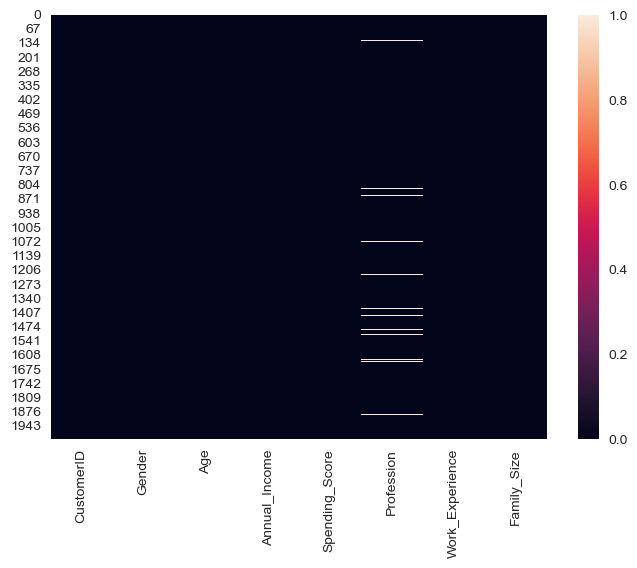

In [81]:
sns.heatmap(df.isna())

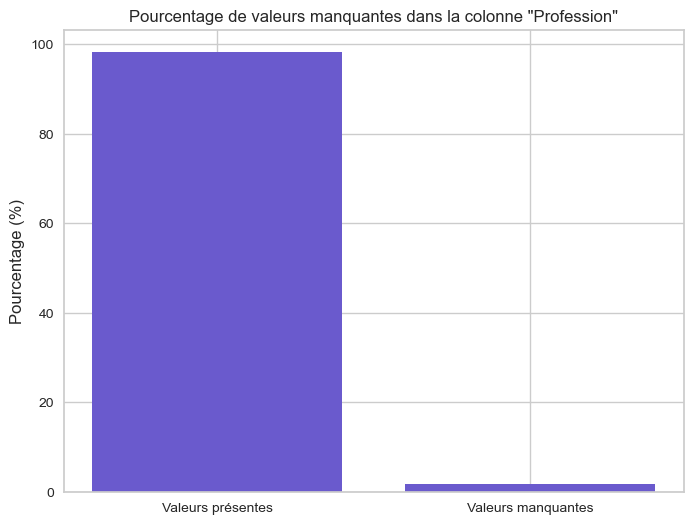

In [82]:
missing_percentage = round(df['Profession'].isnull().sum() * 100 / len(df), 2)

plt.figure(figsize=(8, 6))
plt.bar(['Valeurs présentes', 'Valeurs manquantes'], 
        [100 - missing_percentage, missing_percentage], color='slateblue')
plt.title('Pourcentage de valeurs manquantes dans la colonne "Profession"')
plt.ylabel('Pourcentage (%)')
plt.show()

In [83]:
#Traiter les valeurs manquantes dans la colonne Profession
df['Profession'] = df['Profession'].fillna('Other')
df['Profession'].isna().sum()

0

In [84]:
#Répartition des valeurs dans les colonnes catégoriques

df[['Gender','Profession']].describe()

,Gender,Profession
count,2000,2000
unique,2,10
top,Female,Artist
freq,1186,612


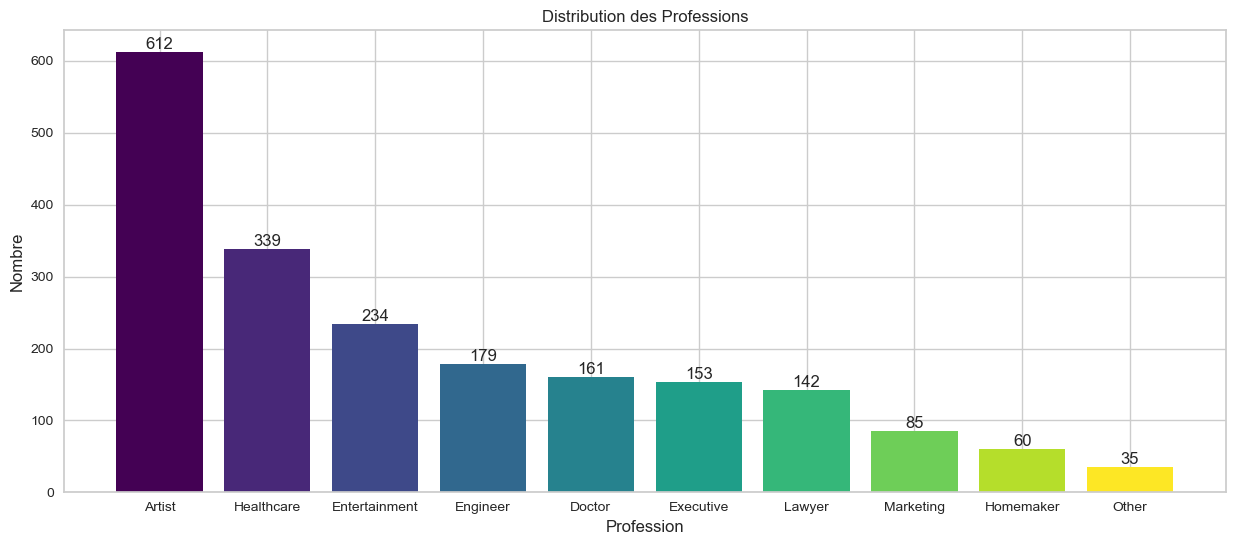

In [85]:
plt.figure(figsize=(15, 6))

profession_counts = df['Profession'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(profession_counts)))

bars = plt.bar(profession_counts.index, profession_counts, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom')

plt.title('Distribution des Professions')
plt.xlabel('Profession')
plt.ylabel('Nombre')

plt.show()

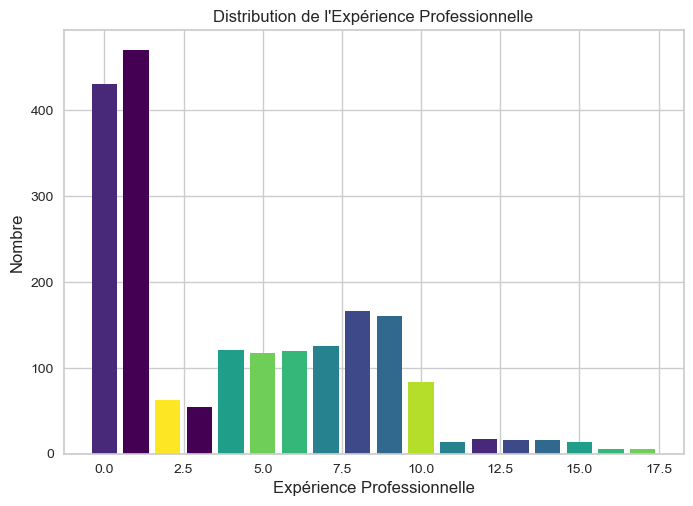

In [86]:
colors = plt.cm.viridis(np.linspace(0, 1, len(profession_counts)))

plt.bar(df['Work_Experience'].value_counts().index, df['Work_Experience'].value_counts(), color=colors)

plt.title('Distribution de l\'Expérience Professionnelle')
plt.xlabel('Expérience Professionnelle')
plt.ylabel('Nombre')

plt.show()

In [87]:
#Répartition des valeurs dans les colonnes numériques (le résumé statistique)
df[['Age', 'Annual_Income', 'Spending_Score', 'Work_Experience', 'Family_Size']].describe()

# sur les attributs quantitatives

,Age,Annual_Income,Spending_Score,Work_Experience,Family_Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


In [88]:
df[df["Age"]==0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
211,212,Female,0,22000,92,Artist,2,1
228,229,Male,0,33000,64,Marketing,1,1
333,334,Male,0,173743,96,Artist,0,4
440,441,Female,0,57373,29,Other,0,7
443,444,Female,0,68761,16,Lawyer,1,4
466,467,Male,0,186002,80,Doctor,15,2
559,560,Male,0,151298,89,Artist,0,6
562,563,Female,0,142892,25,Entertainment,8,1
767,768,Female,0,143910,22,Marketing,1,7
794,795,Female,0,147719,86,Lawyer,1,7


In [89]:
df.loc[df["Age"]==0,"Age"]=int(df[df["Age"]>0]["Age"].median())

df[df["CustomerID"]==938]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
937,938,Female,99,56851,72,Entertainment,6,3


In [90]:
#Vérifiez la présence de valeurs doublant dans la colonne CustomerID
df["CustomerID"].duplicated().sum()

0

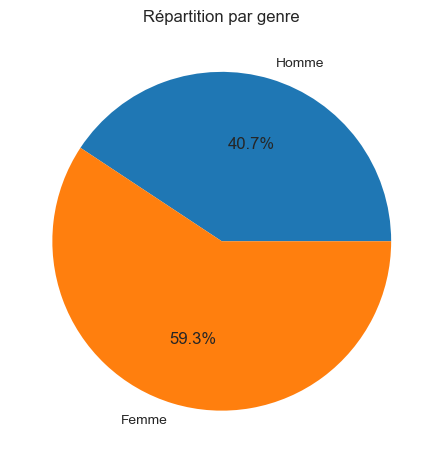

In [91]:
male_count = df[df["Gender"] == 'Male']["Gender"].count()
female_count = df[df["Gender"] == 'Female']["Gender"].count()
 
plt.pie([male_count, female_count], labels=["Homme", "Femme"], 
        autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])

plt.title("Répartition par genre")
plt.show()

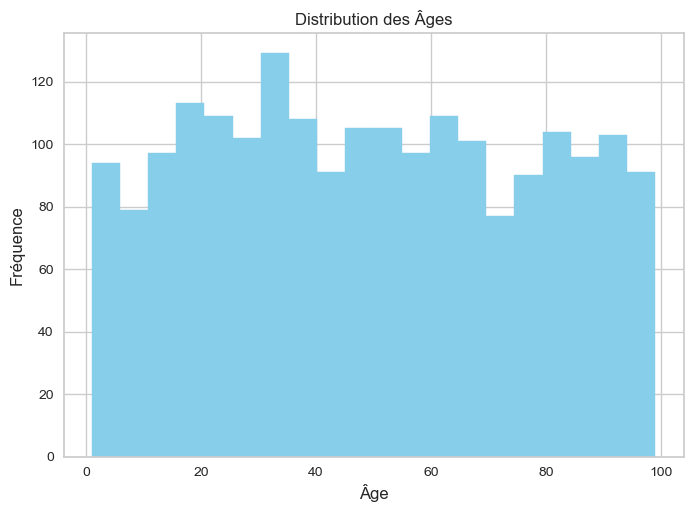

In [92]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='skyblue')

plt.title('Distribution des Âges')
plt.xlabel('Âge')
plt.ylabel('Fréquence')

plt.show()

In [93]:
df.query("Age<18")

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
202,203,Female,16,60000,0,Engineer,6,8
210,211,Female,1,57000,93,Engineer,1,2
229,230,Male,15,94000,30,Healthcare,7,2
230,231,Female,6,93000,53,Lawyer,8,2
234,235,Female,4,84000,54,Artist,9,1
...,...,...,...,...,...,...,...,...
1955,1956,Female,11,181026,39,Marketing,6,2
1974,1975,Female,14,153145,59,Healthcare,8,6
1980,1981,Female,10,86925,76,Artist,7,2
1984,1985,Female,2,153622,51,Lawyer,6,6


In [94]:
#Remplacer les clients qui ont moins de 18 ans par l'âge moyen en fonction de la profession et du genre

mean_age = df.groupby(['Gender', 'Profession'])['Age'].mean()

df['Age'] = df.apply(lambda row: int(mean_age[(row['Gender'], row['Profession'])])
                                 if row['Age'] < 18
                                 else row['Age'], axis=1)

In [26]:
df.query("Age<18")

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size


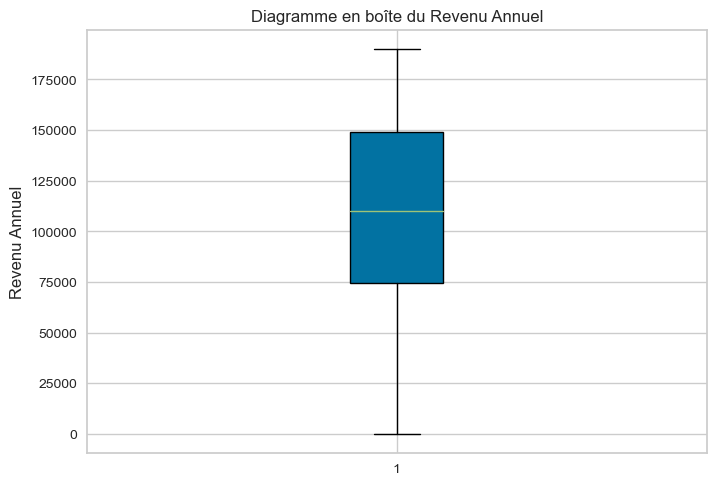

In [95]:
plt.boxplot(df['Annual_Income'], patch_artist=True)

plt.ylabel('Revenu Annuel')
plt.title('Diagramme en boîte du Revenu Annuel')
plt.show()

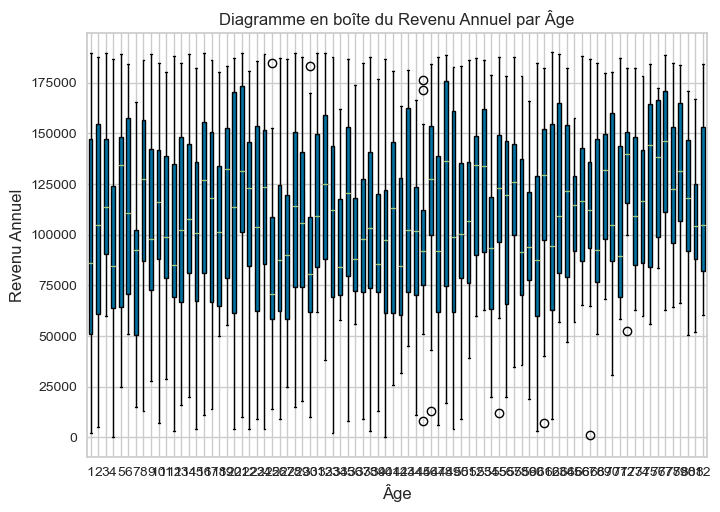

In [96]:
plt.boxplot([df['Annual_Income'][df['Age'] == age] for age in df['Age'].unique()], 
            patch_artist=True)

plt.xlabel('Âge')
plt.ylabel('Revenu Annuel')
plt.title('Diagramme en boîte du Revenu Annuel par Âge')
plt.show()

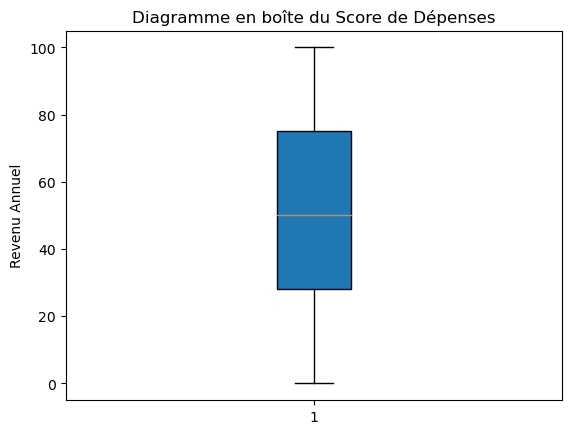

In [38]:
plt.boxplot(df['Spending_Score'], patch_artist=True)

plt.ylabel('Revenu Annuel')
plt.title('Diagramme en boîte du Score de Dépenses')
plt.show()

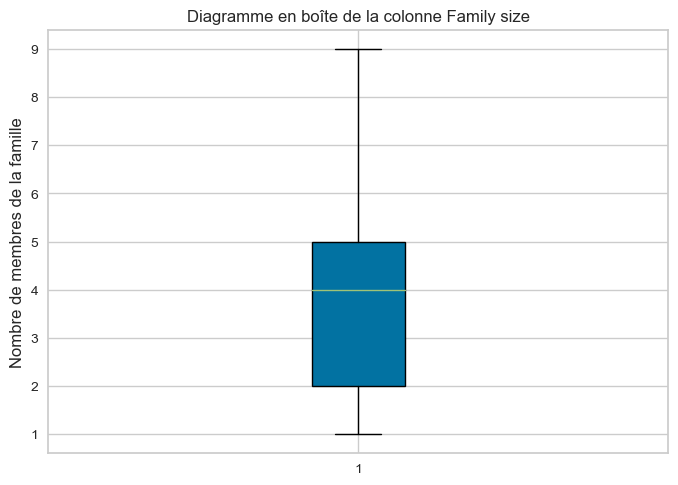

In [97]:
plt.boxplot(df['Family_Size'], patch_artist=True)

plt.ylabel('Nombre de membres de la famille')
plt.title('Diagramme en boîte de la colonne Family size')
plt.show()

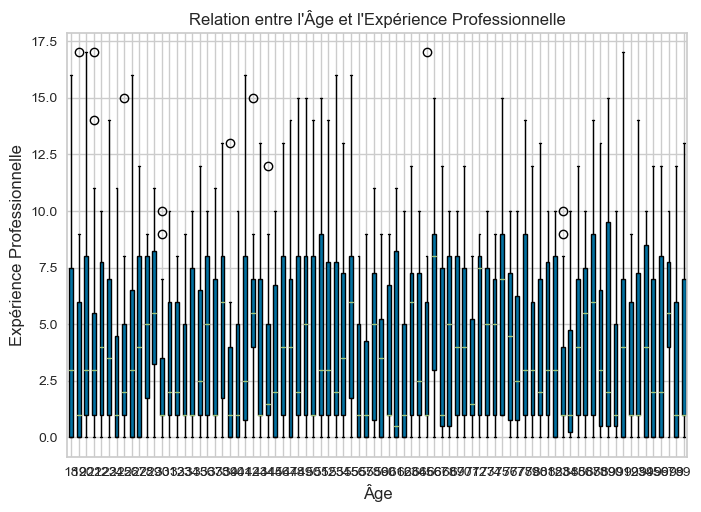

In [98]:
plt.boxplot(df.groupby("Age")["Work_Experience"].apply(list).values, 
            positions=sorted(df["Age"].unique()), patch_artist=True)

plt.title('Relation entre l\'Âge et l\'Expérience Professionnelle')
plt.xlabel('Âge')
plt.ylabel('Expérience Professionnelle')

plt.show()

In [99]:
df[df['Work_Experience'] - df['Age'] >= 0]

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size


In [100]:
#Supprimez les lignes où l'expérience professionnelle est supérieure ou égale à l'âge

df = df.drop(df[df['Work_Experience'] - df['Age'] >= 0].index)

In [101]:
#Le Dataframe après la phase de preprocessing
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.

C:\ProgramDa

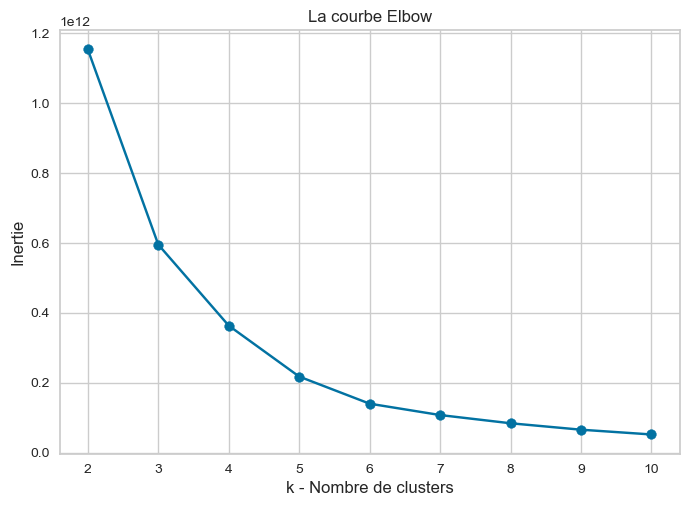

In [104]:
from sklearn.cluster import KMeans

X=df[['Annual_Income','Spending_Score','Work_Experience','Family_Size']]
L=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    iner=kmeans.inertia_
    L.append((k,iner))
    
x=[i[0] for i in L]
y=[i[1] for i in L]
plt.plot(x,y)
plt.scatter(x,y)
plt.title("La courbe Elbow")
plt.xlabel('k - Nombre de clusters')
plt.ylabel('Inertie')
plt.show()  

In [108]:
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(X_pca)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



[2 2 1 ... 1 0 1]
[[-5.06690494e+04 -4.16519407e-01]
 [ 5.07331020e+03 -2.69865582e-01]
 [ 5.47355643e+04  8.25742783e-01]]


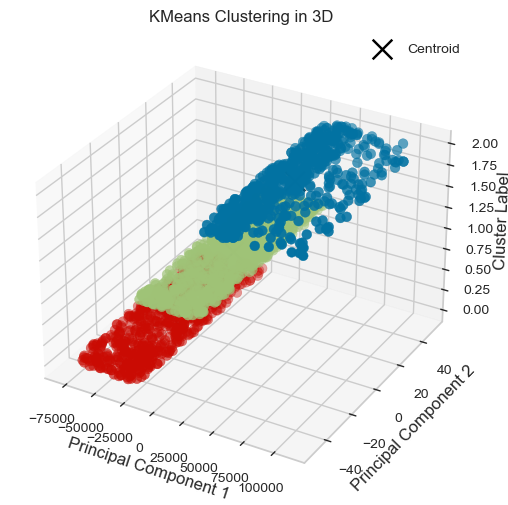

In [109]:
from mpl_toolkits.mplot3d import Axes3D

# Définir les couleurs pour chaque cluster
colors = ['r', 'g', 'b']

# Créer une figure 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracer les points en 3D
ax.scatter(X_pca[:, 0], X_pca[:, 1], kmeans.labels_, c=[colors[label] for label in kmeans.labels_], s=50)

# Tracer les centres de cluster
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], range(len(kmeans.cluster_centers_)),
           c='black', marker='x', s=200, label='Centroid')

# Ajouter des étiquettes d'axe et un titre
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Cluster Label')
ax.set_title('KMeans Clustering in 3D')

# Afficher la légende
ax.legend()

# Afficher le graphique
plt.show()